In [1]:
import torch
from torch.autograd import Variable
import DLEDMD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 所有数据的第0号作为训练数据，其余作为测试数据

In [2]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
TrainData,TestData={},{}
for k in data.keys():
    if '.csv0' in k:
        TrainData[k]=data[k]
    else:
        TestData[k]=data[k]

In [3]:
#Tdata=TrainData[TrainData.keys()]
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(int(TrainData[k].shape[0])):
        xtrain.append(TrainData[k][i,1:TrainData[k].shape[1]-4].tolist())
        ytrain.append(TrainData[k][i,[-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = Variable(torch.FloatTensor(xtrain))
ytrain = Variable(torch.FloatTensor(ytrain))

# Koopman DLEDMD

## 训练

In [4]:
for k in TestData.keys():
    if os.path.exists('./DLEDMD_model/'+k):
        pass
    else:
        os.makedirs('./DLEDMD_model/'+k)

if os.path.exists('./DLEDMD_model/traindata'):
    pass
else:
    os.makedirs('./DLEDMD_model/traindata')

for d in TestData.keys():
    if not os.path.exists('./results/'+d):
        if '.csv0' not in d:
            os.makedirs('./results/'+d)
    
    os.chdir(os.path.pardir)
    if not os.path.exists('./Step4_Compare/results_s/'+d):
        if '.csv0' not in d:
            os.makedirs('./Step4_Compare/results_s/'+d)
    os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step2_Koopman')
        
   
if not os.path.exists('./results/traindata'):
    os.makedirs('./results/traindata')
os.chdir(os.path.pardir)
if not os.path.exists('./Step4_Compare/results_s/traindata'):
    os.makedirs('./Step4_Compare/results_s/traindata')
os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step2_Koopman')

/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step2_Koopman
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv1
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv2
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv3
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv4
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv5
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv6
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv7
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv8
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv9
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv10
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv11
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv12
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
80.csv13
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
56.csv1
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
56.csv2
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
56.csv3
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
56.csv4
/Users/tianwenchon

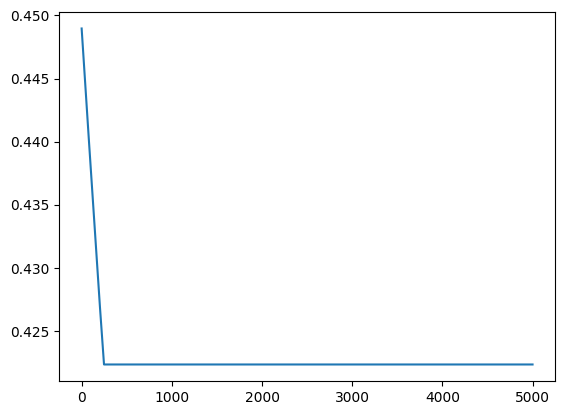

In [5]:
param={
        'X_size':xtrain.shape[1], 
        'Y_size':ytrain.shape[1], 
        'batch_size':xtrain.shape[0],
        'feature_size':100,
        'Xencodering_layer':[100 for _ in range(5)],
        'Yencodering_layer':[100 for _ in range(5)],
        'decodering_layer':[100 for _ in range(6)],
        'output_dim':ytrain.shape[1], 
        'learning_rate':0.00001,
        'opt':'Adam',
    }

param={
        'X_size':xtrain.shape[1], 
        'Y_size':ytrain.shape[1], 
        'batch_size':xtrain.shape[0],
        'feature_size':100,
        'Xencodering_layer':[100 for _ in range(5)],
        'Yencodering_layer':[100 for _ in range(5)],
        'decodering_layer':[100 for _ in range(5)],
        'output_dim':ytrain.shape[1], 
        'learning_rate':0.00001,
        'opt':'Adam',
    }
train = True
initial_train = True

os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step2_Koopman')
print(os.getcwd())

net = DLEDMD.Net(param)

if train:
    optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    if initial_train:
        net.model = torch.load('./DLEDMD_model/kmodel')
    mse=[]
    for t in range(5000):
        output = net(xtrain,ytrain)
        loss = loss_func(output,ytrain)
        mse.append(loss.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    torch.save(net,'./DLEDMD_model/kmodel')
else:
    net.model = torch.load('./DLEDMD_model/kmodel')

K = net.Ku.detach().numpy()
U,s,V=np.linalg.svd(K)
np.save('./results/traindata/U.npy',U)
np.save('./results/traindata/V.npy',V)
np.save('./results/traindata/s.npy',s)
np.save('./results/traindata/K.npy',K)
os.chdir(os.path.pardir)
print(os.getcwd())
np.save('./Step4_Compare/results_s/traindata/U.npy',U)
np.save('./Step4_Compare/results_s/traindata/V.npy',V)
np.save('./Step4_Compare/results_s/traindata/s.npy',s)
np.save('./Step4_Compare/results_s/traindata/K.npy',K)
os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step2_Koopman')
plt.plot(mse)

for k in TestData.keys():
    xtest = TestData[k][:,1:TestData[k].shape[1]-4]
    ytest = TestData[k][:,[-4,-3,-2,-1]]
    xtest = Variable(torch.FloatTensor(xtest))
    ytest = Variable(torch.FloatTensor(ytest))
    print(k)
    out = net(xtest,ytest)
    K = net.Ku.detach().numpy()
    U,s,V=np.linalg.svd(K)
    np.save('./results/'+k+'/U.npy',U)
    np.save('./results/'+k+'/V.npy',V)
    np.save('./results/'+k+'/s.npy',s)
    np.save('./results/'+k+'/K.npy',K)
    
    
    os.chdir(os.path.pardir)
    print(os.getcwd())
    np.save('./Step4_Compare/results_s/'+k+'/U.npy',U)
    np.save('./Step4_Compare/results_s/'+k+'/V.npy',V)
    np.save('./Step4_Compare/results_s/'+k+'/s.npy',s)
    np.save('./Step4_Compare/results_s/'+k+'/K.npy',K)
    os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step2_Koopman')
